In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen 

In [3]:
#获取网页内容
html = urlopen("https://github.com/search?p=1&q=python&type=Repositories&utf8=%E2%9C%93")
#转换成beautifulsoup对象
bsObj = BeautifulSoup(html.read(),"html5lib")
print(bsObj.find('ul',{'class':'repo-list'}).findAll('a'))

[<a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"query":"python","result_position":1,"click_id":2881789,"result":{"id":2881789,"global_relay_id":"MDEwOlJlcG9zaXRvcnkyODgxNzg5","model_name":"Repository","url":"https://github.com/geekcomputers/Python"},"client_id":null,"originating_request_id":"1168:15E3:F9C4C0:16C6806:5AEECA76","user_id":null}}' data-hydro-click-hmac="485fc737834993ac1c0d0b98a23aa1b279d79e7836dcd964d5a1a840192decb2" href="/geekcomputers/Python">geekcomputers/<em>Python</em></a>, <a class="muted-link" href="/geekcomputers/Python/stargazers">
        <svg aria-label="star" class="octicon octicon-star" height="16" role="img" version="1.1" viewBox="0 0 14 16" width="14"><path d="M14 6l-4.9-.64L7 1 4.9 5.36 0 6l3.6 3.26L2.67 14 7 11.67 11.33 14l-.93-4.74z" fill-rule="evenodd"></path></svg>
        5.6k
      </a>, <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number

In [12]:
links=[]
for link in bsObj.find('ul',{'class':'repo-list'}).findAll('h3'):
    links.append('https://github.com/'+link.get_text().strip())
print(links)

['https://github.com/geekcomputers/Python', 'https://github.com/TheAlgorithms/Python', 'https://github.com/Show-Me-the-Code/python', 'https://github.com/xxg1413/python', 'https://github.com/poise/python', 'https://github.com/injetlee/Python', 'https://github.com/kubernetes-client/python', 'https://github.com/exercism/python', 'https://github.com/docker-library/python', 'https://github.com/joe011/python']


In [21]:
def get_urls(page,question):
    links=[]
    for pagenum in range(1,page+1):
        print ('get page%d'%pagenum+r"'s urls")
        html = urlopen("https://github.com/search?p=%d&q=%s"%(pagenum,question)+'&type=Repositories&utf8=%E2%9C%93')
        bsObj = BeautifulSoup(html.read(),"html5lib")
        for link in bsObj.find('ul',{'class':'repo-list'}).findAll('h3'):
            links.append('https://github.com/'+link.get_text().strip())
    print(links)
    return links

get_urls(2,'python')    
               

get page1's urls
get page2's urls
['https://github.com/geekcomputers/Python', 'https://github.com/TheAlgorithms/Python', 'https://github.com/Show-Me-the-Code/python', 'https://github.com/xxg1413/python', 'https://github.com/injetlee/Python', 'https://github.com/poise/python', 'https://github.com/kubernetes-client/python', 'https://github.com/exercism/python', 'https://github.com/docker-library/python', 'https://github.com/joe011/python', 'https://github.com/zhanghe06/python', 'https://github.com/TwoWater/Python', 'https://github.com/PlamenStilyianov/Python', 'https://github.com/521xueweihan/python', 'https://github.com/joeyajames/Python', 'https://github.com/scotty3785/python', 'https://github.com/GoogleCloudPlatform/python-docs-samples', 'https://github.com/bigmlcom/python', 'https://github.com/17mon/python', 'https://github.com/boostorg/python']


['https://github.com/geekcomputers/Python',
 'https://github.com/TheAlgorithms/Python',
 'https://github.com/Show-Me-the-Code/python',
 'https://github.com/xxg1413/python',
 'https://github.com/injetlee/Python',
 'https://github.com/poise/python',
 'https://github.com/kubernetes-client/python',
 'https://github.com/exercism/python',
 'https://github.com/docker-library/python',
 'https://github.com/joe011/python',
 'https://github.com/zhanghe06/python',
 'https://github.com/TwoWater/Python',
 'https://github.com/PlamenStilyianov/Python',
 'https://github.com/521xueweihan/python',
 'https://github.com/joeyajames/Python',
 'https://github.com/scotty3785/python',
 'https://github.com/GoogleCloudPlatform/python-docs-samples',
 'https://github.com/bigmlcom/python',
 'https://github.com/17mon/python',
 'https://github.com/boostorg/python']

In [14]:
#太多请求需要给个延时
import time
def get_urls(page,question):
    links=[]
    print ('get page%d'%page+r"'s urls")
    try:
        html = urlopen("https://github.com/search?p=%d&q=%s"%(page,question)+'&type=Repositories&utf8=%E2%9C%93')
    except:
        print('too many requests,have a sleep')
        time.sleep(50)
        get_urls(page,question) 
    bsObj = BeautifulSoup(html.read(),"html5lib")
    for link in bsObj.find('ul',{'class':'repo-list'}).findAll('h3'):
        links.append('https://github.com/'+link.get_text().strip())
    page=page-1  
    if page==0:
        print(links.reverse)
    else:
        get_urls(page,question)
    
#     for pagenum in range(1,page+1):
#         print ('get page%d'%pagenum+r"'s urls")
#         try:
#             html = urlopen("https://github.com/search?p=%d&q=%s"%(pagenum,question)+'&type=Repositories&utf8=%E2%9C%93')
#         except :
#             print('too many requests,have a sleep')
#             time.sleep(50)
#             try:
#                 html = urlopen("https://github.com/search?p=%d&q=%s"%(pagenum,question)+'&type=Repositories&utf8=%E2%9C%93')
#             except :
#                 print('failed again')
#                 time.sleep(50)
#                 html = urlopen("https://github.com/search?p=%d&q=%s"%(pagenum,question)+'&type=Repositories&utf8=%E2%9C%93')
#         bsObj = BeautifulSoup(html.read(),"html5lib")
#         for link in bsObj.find('ul',{'class':'repo-list'}).findAll('h3'):
#                 links.append('https://github.com/'+link.get_text().strip())
#     print(links)

get_urls(9,'python flask') 

get page9's urls
too many requests,have a sleep
get page9's urls
too many requests,have a sleep


KeyboardInterrupt: 

In [8]:
from selenium import webdriver
driver=webdriver.PhantomJS(executable_path='/root/jupyter_notebook/phantomjs-2.1.1-linux-x86_64/bin/phantomjs')
driver.get('http://www.baidu.com')   #加载网页


/usr/local/python3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [7]:
#selenium 不再建议使用PhantomJS,改用Chrome的headless 
from selenium import webdriver
from pyvirtualdisplay import Display  
  
#无GUI时要先打开display  
display = Display(visible=0, size=(800,600))  
display.start() 

options = webdriver.ChromeOptions()
options.add_argument("--no-sandbox")
browser = webdriver.Chrome(chrome_options=options)

browser.get("https://www.baidu.com")

print(browser.page_source)
browser.quit()  
display.stop()

<!DOCTYPE html><!--STATUS OK--><html xmlns="http://www.w3.org/1999/xhtml"><head>
    
    <meta http-equiv="content-type" content="text/html;charset=utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta content="always" name="referrer" />
    <meta name="theme-color" content="#2932e1" />
    <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
    <link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" />
    <link rel="icon" sizes="any" mask="" href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg" />
	
	
	<link rel="dns-prefetch" href="//s1.bdstatic.com" />
	<link rel="dns-prefetch" href="//t1.baidu.com" />
	<link rel="dns-prefetch" href="//t2.baidu.com" />
	<link rel="dns-prefetch" href="//t3.baidu.com" />
	<link rel="dns-prefetch" href="//t10.baidu.com" />
	<link rel="dns-prefetch" href="//t11.baidu.com" />
	<link rel="dns-prefetch" href="//t12.baidu.com" />
	<link rel="dns-prefetc

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '800x600x24', ':1015'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '800x600x24', ':1015'] oserror=None return_code=0 stdout="" stderr="" timeout_happened=False>

In [15]:
import os 
import sys
import requests
import re
from lxml import etree

ModuleNotFoundError: No module named 'lxml'

In [16]:
dir(re)

['A',
 'ASCII',
 'DEBUG',
 'DOTALL',
 'I',
 'IGNORECASE',
 'L',
 'LOCALE',
 'M',
 'MULTILINE',
 'RegexFlag',
 'S',
 'Scanner',
 'T',
 'TEMPLATE',
 'U',
 'UNICODE',
 'VERBOSE',
 'X',
 '_MAXCACHE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_alphanum_bytes',
 '_alphanum_str',
 '_cache',
 '_compile',
 '_compile_repl',
 '_expand',
 '_locale',
 '_pattern_type',
 '_pickle',
 '_subx',
 'compile',
 'copyreg',
 'enum',
 'error',
 'escape',
 'findall',
 'finditer',
 'fullmatch',
 'functools',
 'match',
 'purge',
 'search',
 'split',
 'sre_compile',
 'sre_parse',
 'sub',
 'subn',
 'template']

In [17]:
help(re)

Help on module re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.6/library/re
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so last mat

In [18]:
#selenium 不再建议使用PhantomJS,改用Chrome的headless 
from selenium import webdriver
from pyvirtualdisplay import Display  
  
#无GUI时要先打开display  
display = Display(visible=0, size=(800,600))  
display.start() 

options = webdriver.ChromeOptions()
options.add_argument("--no-sandbox")
browser = webdriver.Chrome(chrome_options=options)

browser.get("https://wuwenbin.me/")

print(browser.page_source)
browser.quit()  
display.stop()

<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="zh-CN"><head>
    <meta charset="UTF-8" />
<meta content="webkit" name="renderer" />
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible" />
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport" />
<link href="/static/assets/img/favicon.png" rel="shortcut icon" />
<link href="/static/plugins/layui/css/layui.css" rel="stylesheet" />
<link href="/static/plugins/font-awesome/css/font-awesome.min.css" rel="stylesheet" />
<link href="/static/plugins/animate/animate.min.css" rel="stylesheet" />
<link href="/static/assets/css/frontend/style.css" rel="stylesheet" />
    <title>彬码俑的博客</title>
<link id="layuicss-layer" rel="stylesheet" href="https://wuwenbin.me/static/plugins/layui/css/modules/layer/default/layer.css?v=3.1.1" media="all" /></head>
<body class="animated fadeIn">
<div id="index-app"><div class="header"><div class="layui-container"><div class="layui-row nav-header"><div class="la

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '800x600x24', ':1011'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '800x600x24', ':1011'] oserror=None return_code=0 stdout="" stderr="" timeout_happened=False>

In [20]:
#爬取github详情
newurl='https://github.com/poise'
def getNewsDetail(newsurl):
    result={}
    res = requests.get(newsurl)
    res.encoding='utf-8'
    soup=BeautifulSoup(res.text,'html.parser')
    result['author']=soup.select('.author')[0].text
    result['readme']=soup.select('.plain')[0].text
    return result

detail=getNewsDetail(newurl)
print(detail)

IndexError: list index out of range

In [29]:
urls=get_urls(1,'python')
articles={}

for url in urls :
    articles[url[19:]]=url

print((articles))

get page1's urls
['https://github.com/geekcomputers/Python', 'https://github.com/TheAlgorithms/Python', 'https://github.com/Show-Me-the-Code/python', 'https://github.com/xxg1413/python', 'https://github.com/injetlee/Python', 'https://github.com/poise/python', 'https://github.com/kubernetes-client/python', 'https://github.com/exercism/python', 'https://github.com/docker-library/python', 'https://github.com/joe011/python']
{'geekcomputers/Python': 'https://github.com/geekcomputers/Python', 'TheAlgorithms/Python': 'https://github.com/TheAlgorithms/Python', 'Show-Me-the-Code/python': 'https://github.com/Show-Me-the-Code/python', 'xxg1413/python': 'https://github.com/xxg1413/python', 'injetlee/Python': 'https://github.com/injetlee/Python', 'poise/python': 'https://github.com/poise/python', 'kubernetes-client/python': 'https://github.com/kubernetes-client/python', 'exercism/python': 'https://github.com/exercism/python', 'docker-library/python': 'https://github.com/docker-library/python', 'jo

<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" dir="ltr" lang="zh" i18n-processed=""><head>
  <meta charset="utf-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0,&#10;                                 maximum-scale=1.0, user-scalable=no" />
  <title>127.0.0.1</title>
  <style>/* Copyright 2017 The Chromium Authors. All rights reserved.
 * Use of this source code is governed by a BSD-style license that can be
 * found in the LICENSE file. */

a {
  color: rgb(88, 88, 88);
}

body {
  background-color: rgb(247, 247, 247);
  color: rgb(100, 100, 100);
}

#details-button {
  background: inherit;
  border: 0;
  float: none;
  margin: 0;
  padding: 10px 0;
  text-transform: uppercase;
}

.hidden {
  display: none;
}

html {
  -webkit-text-size-adjust: 100%;
  font-size: 125%;
}

.icon {
  background-repeat: no-repeat;
  background-size: 100%;
}</style>
  <style>/* Copyright 2014 The Chromium Authors. All rights reserved.
   Use of this source code is gov
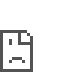
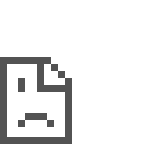
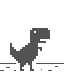
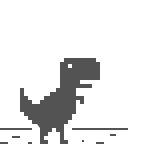
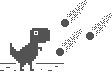
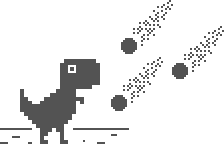
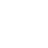
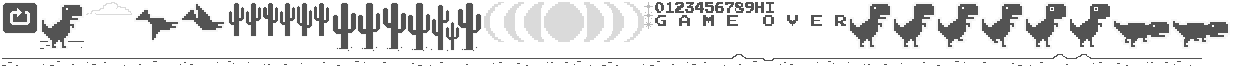
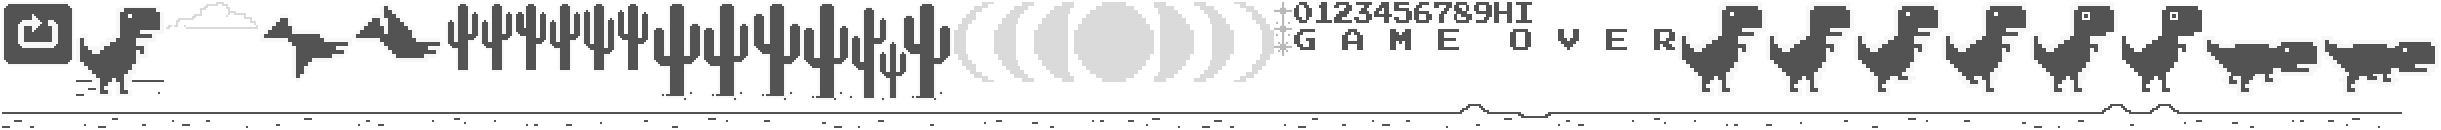

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '800x600x24', ':1025'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '800x600x24', ':1025'] oserror=None return_code=0 stdout="" stderr="" timeout_happened=False>

In [36]:
#selenium 不再建议使用PhantomJS,改用Chrome的headless 
from selenium import webdriver
from pyvirtualdisplay import Display  
  
#无GUI时要先打开display  
display = Display(visible=0, size=(800,600))  
display.start() 

options = webdriver.ChromeOptions()
options.add_argument("--no-sandbox")
browser = webdriver.Chrome(chrome_options=options)

browser.get("http://127.0.0.1/5000/")

print(browser.page_source)
browser.quit()  
display.stop()

In [58]:
res=requests.get('https://github.com/joe011/python')
soup=BeautifulSoup(res.text,'html.parser')
print(soup.select('article')[0].text)


##本项目为日常工作中的使用的python脚本
###1.  ssh_thread.py  是一个批量执行命令的脚本，支持直接执行ssh命令及文件传输，支持多线程
	使用说明如下：

	-h,-H,--help         帮助页面 
    -C, --cmd            执行命令模式 
    -M, --command        执行命令模式 
    -S, --sendfile       传输文件模式 
    -L, --localpath      本地文件路径 
    -R, --remotepath     远程服务器路径 

    IP列表格式:

    IP地址		用户名     密码     端口
    192.168.1.1        root	  123456    22

  	e.g.
          批量执行命令格式： -C "IP列表" -M '执行的命令'
          批量传送文件：     -S "IP列表" -L "本地文件路径" -R "远程文件路径"
    错误日志文件：$PWD/ssh_errors.log

###2. check_ping.py  多进程检测ping，并取值
	默认开启4个进程，需要将hosts.txt IP列表文件放入同一目录下，IP列表每行一个，支持域名、IP

###3. check_ip138.py 通过ip138检测IP（域名）归属地
	使用方法: python check_ip138.py  192.168.1.1

###4. vps_baidu.py  使用baidupan备份VPS
	pip install baidupan

参考：http://solos.github.io/baidupan/

